In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd

In [2]:
wd = os.getcwd()
wd = wd.replace('.ipynb_checkpoints', '')
directory = os.path.join(wd, 'data', 'requests')
retrieved_data =  []
for file in os.listdir(directory):
    with open(os.path.join(directory, file), "r") as j:
        a = json.loads(j.read())
        retrieved_data.append(a)
        print('Added ', file)
#retrieved_data
retrieved_data = sorted(retrieved_data, key=itemgetter('citationCount'), reverse=True)

Added  req4Seasons.json
Added  reqA2D2.json
Added  reqA3D.json
Added  reqA9.json
Added  reqAmodalCityscapes.json
Added  reqAMUSE.json
Added  reqApolloScape.json
Added  reqArgoverse3DTracking.json
Added  reqArgoverseMotionForecasting.json
Added  reqAugKITTI.json
Added  reqBayAreaDataset.json
Added  reqBDD100k.json
Added  reqBDD100KAPS.json
Added  reqBeyondPASCAL.json
Added  reqBLVD.json
Added  reqBoreas.json
Added  reqBoschSmallTrafficLightsDataset.json
Added  reqBoschTL.json
Added  reqBoxy.json
Added  reqBrain4Cars.json
Added  reqCADC.json
Added  reqCADP.json
Added  reqCaltechLanes.json
Added  reqCaltechPedestrian.json
Added  reqCamVid.json
Added  reqCARLA100.json
Added  reqCarlaScenes.json
Added  reqCARRADADataset.json
Added  reqCarsDataset.json
Added  reqCityscapes3D.json
Added  reqCityscapesDVPS.json
Added  reqCODA.json
Added  reqComma2k19.json
Added  reqcommaai.json
Added  reqComplexUrbanDataset.json
Added  reqCooperativeDrivingDatasetCODD.json
Added  reqCrashD.json
Added  reqCULan

Paper releases over time

In [3]:
publications = []
for o_paper in retrieved_data:
    publications.append(o_paper['paperInfo']['year'])

In [4]:
total_citations = np.zeros((1, 15))
print(total_citations)
for o_paper in retrieved_data:
    if 'citations' in o_paper['paperInfo'].keys():
        for citation in o_paper['paperInfo']['citations']:
            if 'year' in citation.keys():
                year = citation['year']
                if year is not None:
                    total_citations[0, year-2008] += 1
total_citations

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[2.000e+00, 1.800e+01, 5.700e+01, 1.140e+02, 1.410e+02, 1.980e+02,
        3.570e+02, 6.140e+02, 8.310e+02, 1.538e+03, 2.540e+03, 4.143e+03,
        6.285e+03, 7.090e+03, 4.356e+03]])

In [5]:
citations = pd.Series(publications).value_counts().sort_index()

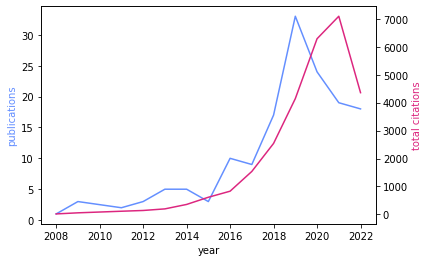

In [6]:
fig,ax = plt.subplots()
ax.plot(citations.index, citations, color='#648fff')
ax.set_ylabel('publications', color='#648fff')
ax.set_xlabel('year')

ax2=ax.twinx()
ax2.plot(citations.index, total_citations[0][1:], color='#dc267f')
ax2.set_ylabel('total citations', color='#dc267f')
plt.savefig('growth_publications_and_citations.pdf', bbox_inches='tight')
plt.show()

In [7]:
publications = []
for o_paper in retrieved_data:
    publications.append(o_paper['paperInfo']['year'])

In [8]:
features = ['number of scenes', 'storage size [GB]', 'total length [h]', 'number of sensors'] #,  'Altmetric score at 3 mos'

In [9]:
meta_data = np.empty((len(retrieved_data), len(features)+1))
meta_data[:] = np.NAN
for index, o_paper in enumerate(retrieved_data):
    if 'year' in o_paper['paperInfo'].keys():
        altmetric = np.NAN
        sensors_value = np.NAN
        frames_value = np.NAN
        lengthOfScenes = np.NAN
        numberOfScenes = np.NAN
        size_hours = np.NAN
        size_storage = np.NAN

        year = o_paper['paperInfo']['year']
        try:
            altmetric = o_paper['altmetrics'][2]['similar_age_3m_percentile']
        except:
            pass
        try:
            if o_paper['sensors'] != "-":
                sensors_value = int(len(list(o_paper['sensors'].split(','))))
        except:
            pass
        try:
            if o_paper['frames'] != "-":
                frames_value = o_paper['frames']
        except:
            pass
        try:
            if o_paper['lengthOfScenes'] != "-":
                lengthOfScenes = o_paper['lengthOfScenes']
        except:
            pass
        try:
            if o_paper['numberOfScenes'] != "-":
                numberOfScenes = o_paper['numberOfScenes']
        except:
            pass
        try:
            if o_paper['size_hours'] != "-":
                size_hours = o_paper['size_hours']
        except:
            pass
        try:
            if o_paper['size_storage'] != "-" and len(o_paper['size_storage']) > 0:
                size_storage = o_paper['size_storage']
        except:
            pass
        meta_data[index, :] = [year, numberOfScenes, size_storage, size_hours, sensors_value] #, altmetric

In [10]:
meta_data

array([[2.013000e+03, 5.000000e+01, 1.800000e+02, 6.000000e+00,
        3.000000e+00],
       [2.013000e+03,          nan,          nan,          nan,
        1.000000e+00],
       [2.016000e+03,          nan,          nan,          nan,
        1.000000e+00],
       [2.019000e+03, 9.300000e+04,          nan, 1.500000e+02,
        4.000000e+00],
       [2.019000e+03, 1.000000e+03,          nan, 1.500000e+01,
        4.000000e+00],
       [2.016000e+03,          nan, 5.705000e+01,          nan,
        1.000000e+00],
       [2.009000e+03, 1.000000e+00,          nan, 1.600000e-01,
        1.000000e+00],
       [2.017000e+03, 1.000000e+02, 2.315000e+04, 2.100000e+02,
        3.000000e+00],
       [2.011000e+03,          nan,          nan,          nan,
        1.000000e+00],
       [2.008000e+03,          nan, 5.500000e-01,          nan,
        1.000000e+00],
       [2.017000e+03,          nan,          nan,          nan,
        1.000000e+00],
       [2.009000e+03, 1.370000e+02,        

In [11]:
df_meta_data = pd.DataFrame(meta_data).set_index(0)


In [12]:
df_meta_data.columns = features

In [13]:
array = np.empty((len(features), 15))
array[:] = np.NAN
for index_type, col in enumerate(df_meta_data.columns):
    for index_year, year in enumerate(range(2008, 2023)):
        annual_data = df_meta_data[df_meta_data.index==year]
        array[index_type, index_year] = annual_data[col].mean()

In [14]:
std = np.empty((len(features), 15))
std[:] = np.NAN
for index_type, col in enumerate(df_meta_data.columns):
    for index_year, year in enumerate(range(2008, 2023)):
        annual_data = df_meta_data[df_meta_data.index==year]
        std[index_type, index_year] = annual_data[col].std()
std

array([[           nan, 9.61665222e+01,            nan,            nan,
        1.20208153e+01, 1.68520028e+02,            nan,            nan,
        4.89106328e+01, 2.95905390e+02, 3.31393900e+04, 8.02421320e+04,
        3.45180718e+05, 3.63995014e+04,            nan],
       [           nan,            nan,            nan,            nan,
                   nan, 6.82061004e+02, 2.64457936e+00,            nan,
        3.31922525e+01, 1.33525097e+04, 7.65568091e+02, 3.94654437e+03,
        1.40930526e+03, 4.28258317e+02,            nan],
       [           nan, 6.95793073e+00,            nan,            nan,
                   nan,            nan,            nan,            nan,
        4.10026015e+00, 1.44136646e+02, 4.10541509e+02, 1.06943286e+02,
        1.03371016e+03, 5.94386844e+02,            nan],
       [           nan, 0.00000000e+00,            nan, 7.07106781e-01,
        5.77350269e-01, 1.30384048e+00, 7.07106781e-01, 0.00000000e+00,
        6.74948558e-01, 7.26483157e-0

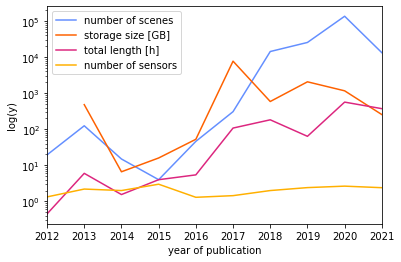

In [15]:
colors = ['#648fff', '#fe6100', '#dc267f', '#ffb000'] #, '#785ef0'
for idx, row in enumerate(features):
    plt.semilogy([*range(2012, 2022)], array[idx, 4:14], label=row, color=colors[idx])

    #if array[idx, 4:14] == np.NaN or std[idx, 4:14] == 0:
    #upper_std = (array[idx, 4:14] + std[idx, 4:14])
    #lower_std = (array[idx, 4:14] - std[idx, 4:14])
    #else:
    #    upper_std = array[idx, 4:14]
    #    lower_std = array[idx, 4:14]
    #plt.fill_between([*range(2012, 2022)], lower_std, upper_std, color=colors[idx], alpha=0.1)
    plt.xlim(2012, 2021)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='best')
plt.xticks([*range(2012, 2022)])
plt.xlabel('year of publication')
plt.ylabel('log(y)')
plt.savefig('growth_of_data.pdf', bbox_inches='tight')
plt.show()
#plt.ylim(0, 1000)

#plt.show()

In [32]:
print(features)

['scenes', 'storage size [GB]', 'total length [h]', 'sensors']
